<a href="https://colab.research.google.com/github/anelyserd/IBM_coursera/blob/master/BDA_Group2_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

from google.colab import files
data = files.upload()

Saving publ_years.csv to publ_years (1).csv


In [8]:
def showHistograms(df, step=1):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    observations = "Observations: " + str(len(df.index))
    mean = f'Span Mean: {df["SPAN"].mean(axis=0):.4f}'

    ax0.set_title('first year histogram')
    n, bins, patches = ax0.hist(df["FIRST_YEAR"], bins=range(int(df["FIRST_YEAR"].min()),int(df["FIRST_YEAR"].max()),step))    
    n = n.astype('int')
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
        
    ax1.set_title('last year histogram')
    n, bins, patches = ax1.hist(df["LAST_YEAR"], bins=range(int(df["LAST_YEAR"].min()),int(df["LAST_YEAR"].max()),step))   
    n = n.astype('int')
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
        
    ax2.set_title('span histogram')
    n, bins, patches = ax2.hist(df["SPAN"], bins=range(int(df["SPAN"].min()),int(df["SPAN"].max())))
    n = n.astype('int')
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
   

    fig.text(0, 0.05, observations, fontsize='xx-large')
    fig.text(0, 0.03, mean, fontsize='xx-large')
    
    plt.show()

In [9]:
data=pd.read_csv("publ_years.csv")

In [10]:
data["SPAN"]=data["LAST_YEAR"]-data["FIRST_YEAR"]+1

In [11]:
data=data.dropna()

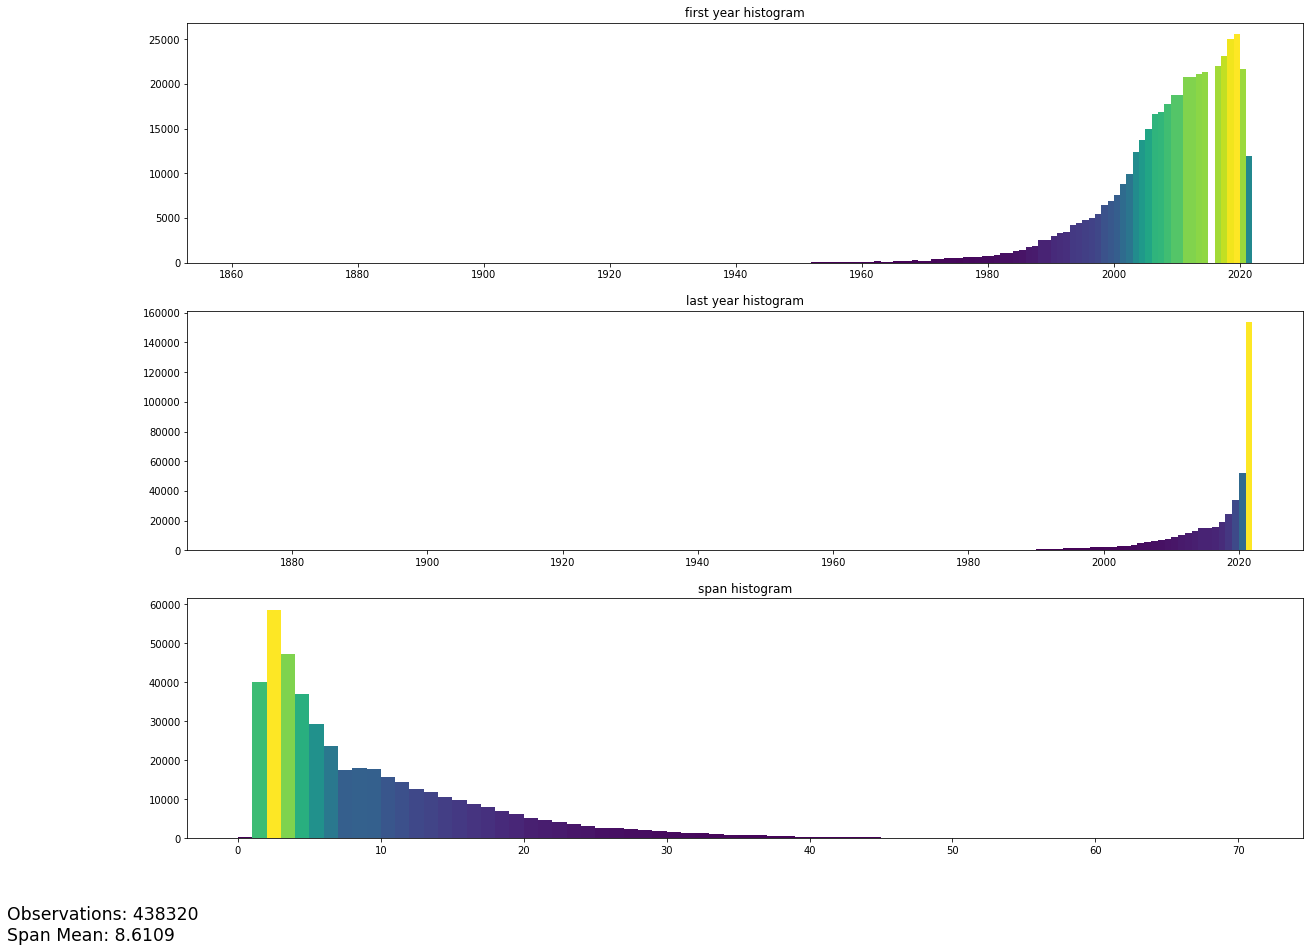

In [12]:
showHistograms(data)

We decided to proceed with bins for each year as the data is already discretely defined by them. Bigger groups of years can be used as well to get the sense of trend at a bigger scale. However, we noticed that there is a particular scrape artifact that can only be seen by usign yearly bins: There are almost no records with FIRST_YEAR = 2015

In [13]:
data[data["FIRST_YEAR"]>2010]["FIRST_YEAR"].value_counts().sort_index(axis=0)

2011.0    20712
2012.0    20750
2013.0    21086
2014.0    21300
2015.0        6
2016.0    21974
2017.0    23160
2018.0    25036
2019.0    25551
2020.0    21684
2021.0    11527
2022.0      358
2023.0       15
Name: FIRST_YEAR, dtype: int64

In order to filter further records, we can perform some sanity checks to review the data integrity

In [14]:
len(data.index)

438320

##### Finding Duplicates

In [15]:
data[data.duplicated(['#KEY'], keep=False)]

,#KEY,FIRST_YEAR,LAST_YEAR,SPAN
1210,homepages/95/3736-69,2005.0,2005.0,1.0
1211,homepages/95/3736-69,2005.0,2005.0,1.0
3198,homepages/154/1723,2014.0,2021.0,8.0
3199,homepages/154/1723,2014.0,2021.0,8.0
3228,homepages/198/0363,2017.0,2018.0,2.0
...,...,...,...,...
425788,homepages/146/6972,2013.0,2017.0,5.0
428639,homepages/76/5300,1879.0,1880.0,2.0
428640,homepages/76/5300,1879.0,1880.0,2.0
432879,homepages/160/8303,2013.0,2015.0,3.0


##### first_year is bigger than last_year

In [16]:
data[data["FIRST_YEAR"]>data["LAST_YEAR"]]

,#KEY,FIRST_YEAR,LAST_YEAR,SPAN
4195,homepages/194/3750,2019.0,2018.0,0.0
4277,homepages/91/6485,2009.0,2008.0,0.0
4278,homepages/91/6485,2009.0,2008.0,0.0
6130,homepages/204/8081,2022.0,2021.0,0.0
6484,homepages/84/4798,2014.0,2013.0,0.0
...,...,...,...,...
424459,homepages/80/2295,2017.0,2016.0,0.0
425734,homepages/122/0521,2023.0,2022.0,0.0
431510,homepages/152/3109,2022.0,2021.0,0.0
432730,homepages/206/3463,2020.0,2019.0,0.0


All of these cases have span = 0, which is the "minimum" found on the data

In [ ]:
data[data["FIRST_YEAR"]>data["LAST_YEAR"]]["SPAN"].value_counts()

0.0    190
Name: SPAN, dtype: int64

#### Review of Outlier Cases

In [ ]:
data[data["SPAN"]==data["SPAN"].max()]

,#KEY,FIRST_YEAR,LAST_YEAR,SPAN
154065,homepages/s/ClaudeEShannon,1948.0,2019.0,72.0
227133,homepages/28/6339,1949.0,2020.0,72.0


It's very likely that Claude Shannon's last publication was posthumously or honorific

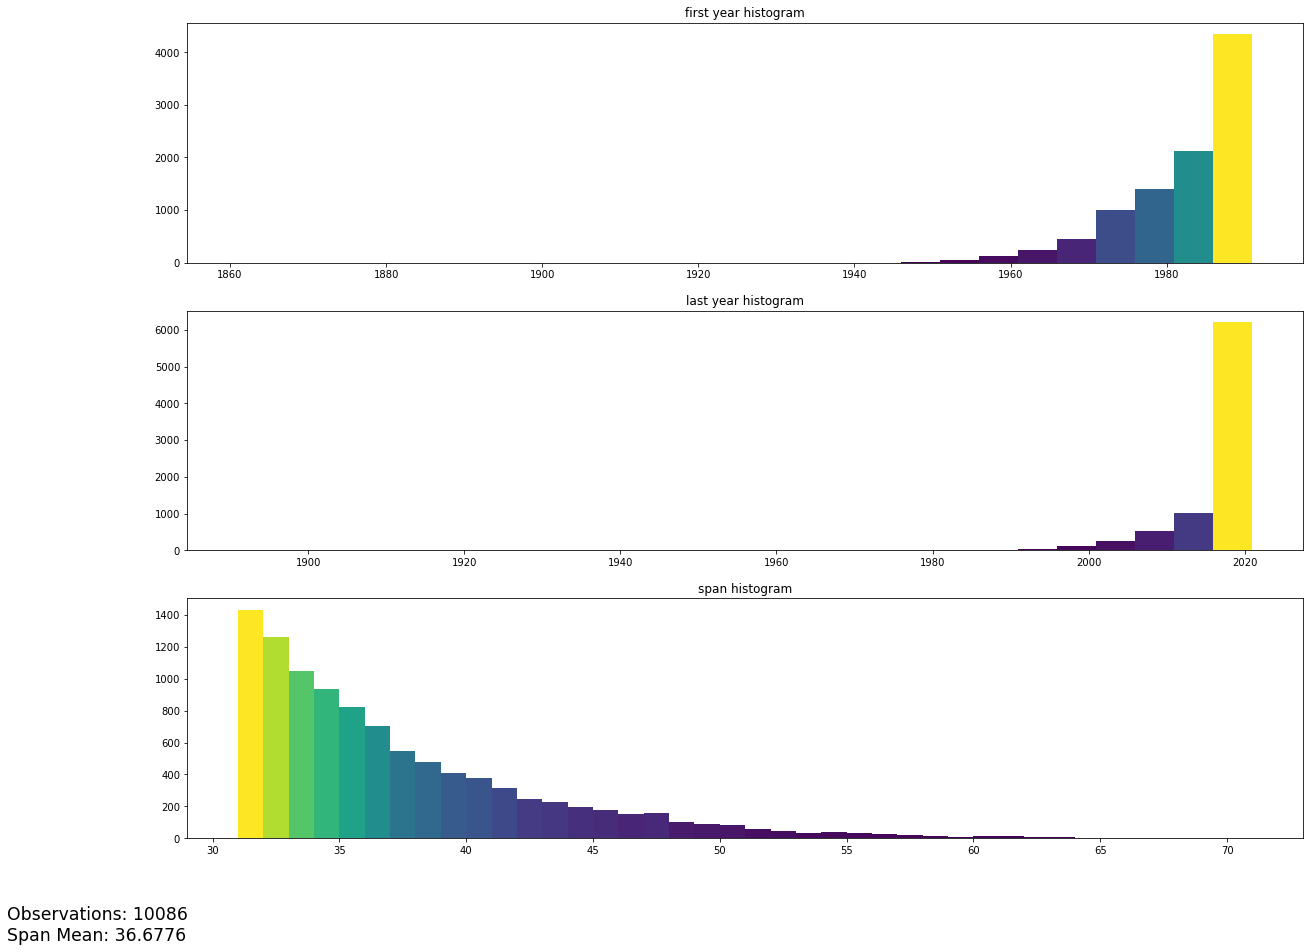

In [ ]:
showHistograms(data[data["SPAN"]>30],5)

In [ ]:
data[data["SPAN"]>50]

,#KEY,FIRST_YEAR,LAST_YEAR,SPAN
695,homepages/132/6185,1959.0,2014.0,56.0
3279,homepages/38/1509,1968.0,2018.0,51.0
3391,homepages/55/6344,1961.0,2020.0,60.0
4198,homepages/89/4854,1966.0,2016.0,51.0
6383,homepages/27/6580,1969.0,2021.0,53.0
...,...,...,...,...
432927,homepages/73/2376,1967.0,2019.0,53.0
433182,homepages/71/962,1967.0,2017.0,51.0
433656,homepages/g/CCGotlieb,1954.0,2010.0,57.0
436093,homepages/14/5288,1962.0,2015.0,54.0


In [17]:
range(int(data["LAST_YEAR"].min()),int(data["LAST_YEAR"].max()))

range(1872, 2023)

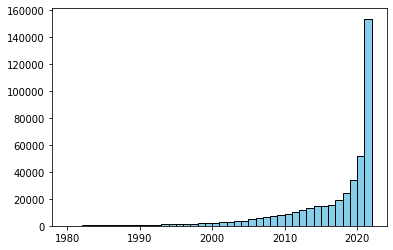

In [18]:
plt.hist(data["LAST_YEAR"], bins=range(1980,2023),color='skyblue', ec='black')
plt.rcParams['figure.figsize'] = [20, 5]